In [1]:
import pandas as pd
import numpy as np

In [2]:
kdd = pd.read_csv(r"KDD.csv")

In [56]:
kdd
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,icmp,eco_i,SF,18,0,0,0,0,0,...,1,1.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,probe
1,69,tcp,telnet,SF,331,2762,0,0,0,0,...,1,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,r2l
2,0,icmp,eco_i,SF,18,0,0,0,0,0,...,2,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,probe
3,0,icmp,eco_i,SF,18,0,0,0,0,0,...,71,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,probe
4,0,icmp,eco_i,SF,18,0,0,0,0,0,...,78,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,probe


In [57]:
x = kdd.iloc[:,0:41].values 
x

array([[0, 'icmp', 'eco_i', ..., 0.0, 0.0, 0.0],
       [69, 'tcp', 'telnet', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'eco_i', ..., 0.0, 0.0, 0.0],
       ...,
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0]], dtype=object)

In [58]:
y = kdd.iloc[:,41].values
y

array(['probe', 'r2l', 'probe', ..., 'dos', 'dos', 'dos'], dtype=object)

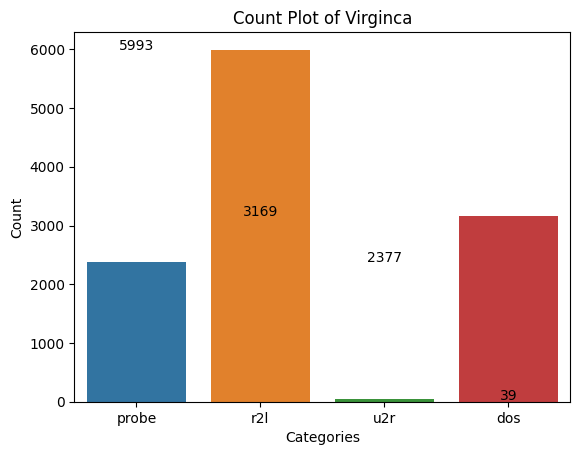

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.countplot(data=kdd, x="label")
value_counts = kdd["label"].value_counts()
for i,count in enumerate(value_counts):
    plot.text(x=i,y=count+1,s=str(count),ha="center")
plot.set_xlabel("Categories")
plot.set_ylabel("Count")
plot.set_title("Count Plot of Virginca")
plt.show()

In [50]:
labels = set(y)
labels

{0, 1, 2, 3}

In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [52]:
y = le.fit_transform(y)
y

array([1, 2, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
print("x shape is",x.shape)
print("Y shape is",y.shape)
print("x_test shape is",x_test.shape)
print("X_train shape is",x_train.shape)
print("y_train shape is",y_train.shape)
print("y_test shape is",y_test.shape)


x shape is (11578, 41)
Y shape is (11578,)
x_test shape is (2316, 41)
X_train shape is (9262, 41)
y_train shape is (9262,)
y_test shape is (2316,)


In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categories = ['protocol_type','service','flag ','label']
encoded_labels = label_encoder.fit_transform(categories)
print(encoded_labels)

[2 3 0 1]


In [42]:
kdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11578 entries, 0 to 11577
Data columns (total 42 columns):
duration                       11578 non-null int64
protocol_type                  11578 non-null object
service                        11578 non-null object
flag                           11578 non-null object
src_bytes                      11578 non-null int64
dst_bytes                      11578 non-null int64
land                           11578 non-null int64
wrong_fragment                 11578 non-null int64
urgent                         11578 non-null int64
hot                            11578 non-null int64
num_failed_logins              11578 non-null int64
logged_in                      11578 non-null int64
num_compromised                11578 non-null int64
root_shell                     11578 non-null int64
su_attempted                   11578 non-null int64
num_root                       11578 non-null int64
num_file_creations             11578 non-null int64
num_

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)

ValueError: could not convert string to float: 'icmp'